# Example of inhomogeneous 2nd order ODE

---
This code is made available as part of the **FRIB-TA Summer School: A Practical Walk Through Formal Scattering Theory: Connecting Bound States, Resonances, and Scattering States in Exotic Nuclei and Beyond**, held virtually
August 4-6, 2021.

https://fribtascattering.github.io/

*Organizers/Lecturers:*
- Kévin Fossez (MSU/ANL)
- Sebastian König (NCSU)
- Heiko Hergert (MSU)

*Author:* Kévin Fossez

*Last update:* Aug 25, 2021

---

In [3]:
import numpy as np
from scipy.integrate import solve_ivp

The equation we want to solve is:

\begin{equation}
y''(t) - 5y'(t) + 4y(t) = e^{4t}
\end{equation}

and, thanks to the variation of parameters method, we know that the analytical solution is:

\begin{equation}
y(t) = A e^{4t} + B e^t + \frac{t}{3} e^{4t}
\end{equation}

To check that we obtained the correct solution, below, we solve the ODE numerically using the following boundary conditions:

\begin{align}
& y(0) = 0 \\
& y'(0) = 1
\end{align}

These conditions give $A = -B = \frac{2}{9}$ analytically.

Numerically, the way to solve a second order ODE is also to split the problem into a set of two first order ODEs, but here, the method is trivial since the integration is done numerically. The idea is to introduce an artificial function $v(t) = y'(t)$ and to simply solve:

\begin{align}
& y'(t) = v(t) \\
& v'(t) = 5 v(t) - 4y(t) + e^{4t} \quad (= y''(t))
\end{align}

By design, an ODE solver takes a function (or a vector of functions) at a point $t = t_0$ and a function to calculate the derivative, and returns the function at a point $t > t_0$ (assuming forward integration). We thus have precisely the definition of the first function needed:


In [4]:
def deriv(t,u):
    # u = [y,v]
    # du = [dy,dv]
    du=[0,0]
    du[0] = u[1] #dy = v
    du[1] = 5.0*u[1] - 4.0*u[0] + np.exp(4.0*t) #dv = y''
    return du

Then, we need to set the initial condition and solve between, let's say, $t=0$ and $t=10$:

In [5]:
u0 = np.array([0,1]) 
sol = solve_ivp(
        deriv, 
        [0,10], 
        u0,
        dense_output=True)

Once the solution is obtained, we can define a function for the analytical solution and print the difference between the exact and numerical solutions. Of course, since the solution has an exponential character, we will plot the difference of the logarithms.

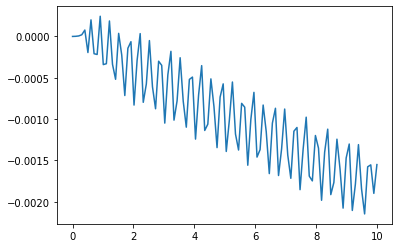

In [9]:
def y_exact(t):
    return 2.0/9.0*np.exp(4.0*t) - 2.0/9.0*np.exp(t) + t/3.0*np.exp(4.0*t)

t = np.linspace(0.0001, 10, 100) # not 0.0 for the log
u = sol.sol(t) 

import matplotlib.pyplot as plt
plt.plot(t, np.log(u[0]) - np.log(y_exact(t)),'-', label='diff_log(t)') 
plt.show()

We see that the difference of the logs is fairly small (but growing) even though the solution takes very large values when $t = 10$.